# METODI PREDITTIVI


09/04/2024

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats
import sklearn

# Parte 1. Regressione Lineare 

Utilizziamo la tabella integrate_titles che abbiamo prodotto durante il primo laboratorio. Vi ricordo che abbiamo effettuato integrazione di due dataset provenienti da Disney+ e Netflix, contenenti informazioni circa film e serie tv rilasciate sulle due piattaforme di streaming. Il dataset integrato è stato pulito e risulta quindi pronto per ulteriori analisi.

Importiamo il dataset:

In [2]:
integrate_titles = pd.read_csv('integrate_titles_3.csv')

visualizziamo il dataset

In [3]:
integrate_titles.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,title,type,release_year,age_certification,runtime,genres,...,director,country,date_added,rating,duration,year,month,day,imdb_score_quant,release_year_quant
0,1,1,1,tm82169,Rocky,MOVIE,1976,PG,119,"['drama', 'sport']",...,John G. Avildsen,United States,2019-08-01,PG,120 min,2019.0,8.0,1.0,EXCELLENT,VERY OLD
1,2,2,2,tm17823,Grease,MOVIE,1978,PG,110,"['comedy', 'romance']",...,Randal Kleiser,United States,2019-11-01,PG,110 min,2019.0,11.0,1.0,VERY GOOD,VERY OLD
2,3,3,3,tm69975,Rocky II,MOVIE,1979,PG,119,"['drama', 'sport']",...,Sylvester Stallone,United States,2019-08-01,PG,119 min,2019.0,8.0,1.0,VERY GOOD,VERY OLD
3,4,4,4,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['fantasy', 'comedy']",...,"Terry Gilliam, Terry Jones",United Kingdom,2019-01-02,PG,92 min,2019.0,1.0,2.0,EXCELLENT,VERY OLD
4,5,5,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",...,NaN,United Kingdom,2018-10-02,TV-14,4 Seasons,2018.0,10.0,2.0,EXCELLENT,VERY OLD


In [4]:
integrate_titles.info()
#togliamo le righe che hanno valori nulli su tmdb_score
integrate_titles=integrate_titles.dropna(axis=0, subset=['tmdb_score'])
integrate_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4170 entries, 0 to 4169
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.2          4170 non-null   int64  
 1   Unnamed: 0.1          4170 non-null   int64  
 2   Unnamed: 0            4170 non-null   int64  
 3   id                    4170 non-null   object 
 4   title                 4170 non-null   object 
 5   type                  4170 non-null   object 
 6   release_year          4170 non-null   int64  
 7   age_certification     2593 non-null   object 
 8   runtime               4170 non-null   int64  
 9   genres                4170 non-null   object 
 10  production_countries  4170 non-null   object 
 11  seasons               1588 non-null   float64
 12  imdb_id               4170 non-null   object 
 13  imdb_score            4170 non-null   float64
 14  imdb_votes            4165 non-null   float64
 15  tmdb_popularity      

Supponiamo di voler stimare una funzione che preveda l'imdb_score a partire dallo score tmdb. Prima di tutto, possiamo utilizzare una rappresentazione grafica per verificare se le due features siano correlate, e se sia quindi possibile utilizzare una di queste features per predire l'altra. 


Text(0, 0.5, 'imdb_score')

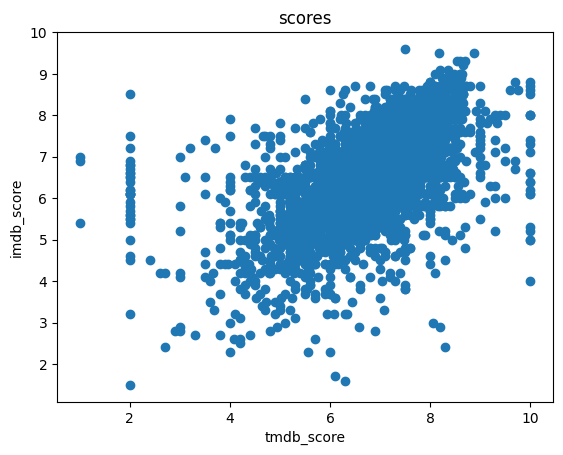

In [5]:
plt.scatter(integrate_titles['tmdb_score'], integrate_titles['imdb_score'])
plt.title('scores')
plt.xlabel('tmdb_score')
plt.ylabel('imdb_score')

verifichiamo la correlazione utilizzando il coefficiente di correlazione di Pearson (r). 

Vi ricordo che r ha valori nell'intervallo [-1,1].  

Inoltre:

r in [0,0.3] debole correlazione;

r in [0.3,0.7] moderata correlazione;

r in [0.7,1] forte correlazione; 

i valori negativi del coefficiente di correlazione indicano una correlazione inversa, cioè all'aumentare di una caratteristica diminuisce l'altra e viceversa. 


In [6]:
correlation, p_value = stats.pearsonr(integrate_titles['tmdb_score'],integrate_titles['imdb_score'])
print("Coefficiente di Pearson: ", correlation)

Coefficiente di Pearson:  0.591232934435519


plottiamo in falsi colori

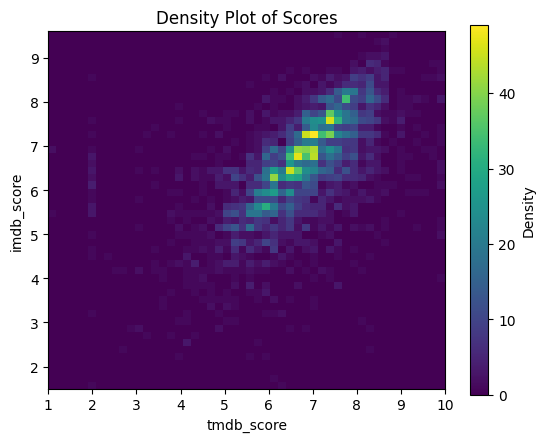

In [7]:
# Calcoliamo una rappresentazione a griglia della densità dei punti
x = integrate_titles['tmdb_score']
y = integrate_titles['imdb_score']
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

# Plottiamo il grafico a dispersione in falsi colori
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis')
plt.colorbar(label='Density')
plt.title('Density Plot of Scores')
plt.xlabel('tmdb_score')
plt.ylabel('imdb_score')
plt.show()

Ora ci chiediamo, quale modello di machine learning possiamo utilizzare per stimare una funzione che preveda l'imdb_score a partire dallo score tmdb. 

Dobbiamo determinare una relazione tra predittori e una variabile di risposta (che possiamo considerare continua).

Possiamo quindi utilizzare un modello di Regressione lineare.

Ricordate che dobbiamo dividere il dataset a disposizione in due diversi gruppi:

* Training Set -> porzione di dati che utilizziamo per il training del nostro modello di regressione lineare;

* Validation Set -> porzione di dati che utilizziamo per valutare il nostro modello precedentemente allenato.

Non esiste un unico modo per dividere il dataset in training e validation, normalmente, si utilizza un random split con una certa percentuale (per esempio 70/30 per training/test).


Usiamo la libreria scikit-learn, lo schema che dovrete usare e' il seguente:

1. Definire le caratteristiche da usare;
2. Definire X e y; 
3. Dividere il dataset in training e validation; 
4. Istanziare un oggetto della classe LinearRegression;
5. Allenare usando la funzione fit invocata sull'oggetto istanziato (passando il training set!);
6. Visualizzare i coefficienti imparati: useremo gli attributi *intercept_=* e *coef_* sull'oggetto ottenuto come output della funzione fit.

In scikit-learn esiste la funzione:

    X_train, X_valid, y_train, y_valid = train_test_split(X, y)

che effettua per noi lo splitting.

In [8]:
from sklearn.model_selection import train_test_split
#codice qui 
# Definiamo le caratteristiche da usare
X = integrate_titles[['tmdb_score']] #tmdb_score sarà il nostro predittore
y = integrate_titles['imdb_score'] #imdb_score sarà la variabile da predire (target)

# Dividiamo il dataset in training set e validation set usando la proporzione 70/30
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)


adesso implementiamo la regressione

In [9]:
from sklearn.linear_model import LinearRegression
# Istanziamo l'oggetto della classe LinearRegression
regressor = LinearRegression()

# Alleniamo il modello passando il training set
regressor.fit(X_train, y_train)

# Visualizziamo i coefficienti imparati
print("Intercept:", regressor.intercept_)
#usiamo l'indexing e prendiamo il primo (e unico) coefficiente, ma se avessimo più variabili predittive (altre oltre imdb_score)
#potremmo accedere ai coefficienti relativi a tutte in questo array
print("Coefficiente tmdb_score", regressor.coef_[0]) 

Intercept: 2.470772316986527
Coefficiente tmdb_score 0.609145669459637


il risultato ottenuto sembra indicare che, ad un aumento di una unità del tmdb_score sia associato un aumento di circa 0.609 nell'imdb_score previsto

Adesso possiamo usare il modello imparato, per effettuare predizioni sul validation set. E' sufficiente usare la funzione predict sull'oggetto restituito da fit, passando come argomento x_valid

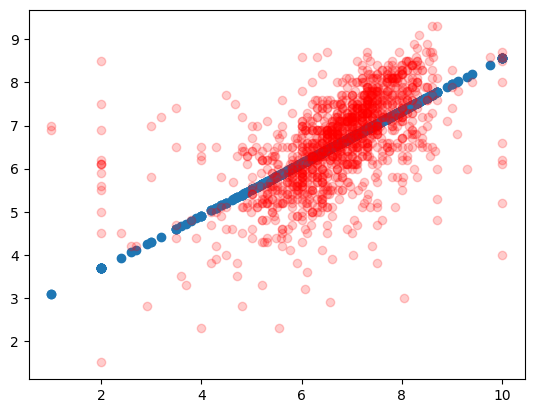

In [10]:
y_hat =regressor.predict(X_valid)

plt.scatter(X_valid,y_hat)
plt.scatter(X_valid,y_valid,c='r',alpha=0.2)

Ora, come possiamo stimare la precisione della funzione che abbiamo imparato?

Sappiamo che non esiste una soluzione perfetta, ma possiamo trovare la soluzione migliore possibile, con i dati a disposizione. Per trovarla, useremo stime degli errori.

Abbiamo visto che ci sono tre metriche per valutare i modelli a regressione di machine learning:

lo scarto medio assoluto (MAE - Mean Absolute Error);
l’errore quadratico medio (MSE - Mean Squared Error);
la radice dell’errore quadratico medio (RMSE - Root of Mean Squared Error).
ESERCIZIO: scrivete una funzione che implementi ciascuna delle tre metriche sopra descritte.

In [ ]:
def MSE (y_pred,y_true):

  #codice qui 

def MAE (y_pred,y_true):

  #codice qui 


def RMSE (y_pred,y_true):

 #codice qui 

usate le tre funzioni appena definite, per calcolare le tre metriche sul modello di regressione lineare appena ottenuto (sul validation set)

In [ ]:
#MAE



#MSE


#RMSE


possiamo anche utilizzare le funzioni messe a disposizione da scikit-learn.

In [ ]:
import sklearn.metrics as metrics 
print ('MAE:', metrics.mean_absolute_error(y_valid, y_pred))
print ('MSE:', metrics.mean_squared_error(y_valid, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

Come faccio a sapere se questo risultato e' un buon risultato oppure no?

Determiniamo il modello nullo.

il modello nullo rappresenta in modo efficace il fatto di tirare a indovinare più e più volte il risultato atteso, e vedere l’efficacia del modello.

Nella regressione, possiamo sostituire tutti i valori della feature imdb_score con la media sull'intero dataset.

In [ ]:
#calcolate lo score medio


# create la nuova x con lo stesso numero di campioni del validation set originale, e con tutti i valori uguali al valore medio dello score appena calcolato
null_model_y = [mean_imdb_score] * y_valid.shape[0]


#stampate gli errori

ESERCIZIO.

* Adesso, utilizzate come test set la tabella amazon_titles. 

1. Pulite e preparate il dataset;

2. Applicate il modello di regressione imparato;

3. Sfruttate errori a dispozione e modello nullo per determinare se riusciamo a generalizzare bene verso questo set di dati.

In [ ]:
#leggiamo e visualizziamo


In [ ]:
#verifichiamo elementi nulli ed eliminamo


In [ ]:
#applichiamo il modello imparato

#visualizziamo

calcoliamo gli errori corrispondenti

In [ ]:
#codice qui, usate le funzioni scikit-learn

In [ ]:
#calcolate lo score medio

# create la nuova x con lo stesso numero di campioni del validation set originale, e con tutti i valori uguali al valore medio dello score appena calcolato


#calcoliamo errori

cosa pensate del modello imparato? traete le opportune conclusioni

# Parte 2. Regressione Logistica 

Adesso, proviamo a risolvere un problema di classificazione, utilizzando la regressione logistica, come visto a lezione. 


Riuscite a trasformare il nostro problema di stimare imdb_score a partire dal tmdb_score, da regressione a classificazione? 

**tip** create una nuova colonna e provate a creare la caratteristica *above_average* che sia:

- 1 Se imdb_score > mean(imdb_score);
- 0 altrimenti. 

Usiamo il dataset integrate_titles come fatto in precedenza. 

In [ ]:
#creiamo la colonna integrate_titles['above_average']

In [ ]:
from sklearn.linear_model import LogisticRegression

Passi da eseguire (molto simile a quanto gia' fatto):

1. Splittare dataset in training e test;
2. Istanziare un oggetto della classe LogisticRegression;
3. Fare fit su training set;
4. Usare la funzione score che fornisce l'accuratezza intesa come numero di volte in cui abbiamo predetto correttamente la classe rispetto al totale.

In [ ]:
from sklearn.linear_model import LogisticRegression
#codice qui

Benissimo, siamo riusciti a raggiungere un'accuratezza del 80% con un modello di logistic regression. 

quale sarebbe un opportuno modello nullo per confrontare?

possiamo immaginare di predire sempre la classe più comune. Verificate quale sia, e deducete score per il modello nullo. 

In [ ]:
#codice qui per modello nullo

traete le vostre conclusioni.

Compito per casa.

Provate ad utilizzare il dataset di amazon come test, e ripetete tutto quanto visto per la tabella integrata di netflix e disney plus. 

In [ ]:
#applichiamo il modello imparato